# *Credit EDA & Credit Score Calculation with Python*

### Problem statement:
To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =  pd.read_csv(r"Credit_score.csv", low_memory=False)

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


In [4]:
#Shape of the df
df.shape

(100000, 27)

### *Insights:-*
The df consists of 27 columns and 100000 rows.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### *Insights:-*
From the above df, we can see that there are a few columns that have an improper dftype. The columns - Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly, Monthly_Balance are object dftyped but they should be a number dftype like int or float.

Now, we will make sure that we will change the dftype of these columns from object to a numerical dftype like int or float.
Here, the columns - Month, Occupation, Type_of_Loan, Credit_Mix, Payment_of_Min_Amount, Payment_Behaviour are categorical. Hence, we modify the dftypes of these columns to category.

In [6]:
#Summary statistics of the numerical columns in the df
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000,100000,0x1602,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,100000,12500,CUS_0xd40,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,90015,10139,Langep,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000,1788,38,2833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSN,100000,12501,#F%$D@*&8,5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,100000,16,_______,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000,18940,36585.12,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,84998.0,NaN,NaN,NaN,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.63333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,17.09128,117.404834,-1.0,3.0,6.0,7.0,1798.0


In [7]:
#Missing df by columns in the df
df.isnull().sum().sort_values(ascending = False)

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
Annual_Income                   0
Credit_Mix                      0
Payment_Behaviour               0
Month                           0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Age                             0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
SSN                             0
Num_Bank_Accounts               0
Changed_Credit_Limit            0
Occupation                      0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
ID                              0
dtype: int64

### *Insights:-*
From the above df, we can see that there are missing values in the columns - Monthly_Inhand_Salary, Type_of_Loan, Name, Credit_History_Age, Num_of_Delayed_Payment, Amount_invested_monthly, Num_Credit_Inquiries, Monthly_Balance. Now, lets look where these missing values are present in these columns i.e., whether these values are clustered at a single place or scattered in the df.

In [8]:
df["Annual_Income"]=df["Annual_Income"].str.replace("_","")
df["Annual_Income"]

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 100000, dtype: object

### *Insights:-*
We removed _ from Annual_Income column. Annual income from 19114 to 39628

In [9]:
num_cols=['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']

df[num_cols]=df[num_cols].apply(pd.to_numeric,errors="coerce")

### *Insights:-*
We converted object column to numeric

### Remove NA values

In [10]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [11]:
df["Age"].mean()

110.93450521244255

In [12]:
df.loc[df['Age'] <= 0, 'Age'] = 50
df.loc[df['Age'] >= 100, 'Age'] = 50

In [13]:
df["Age"].mean()

34.58995

In [14]:
df["Monthly_Inhand_Salary"].fillna(np.mean(df["Monthly_Inhand_Salary"]),inplace=True)

In [15]:
df["Num_of_Delayed_Payment"].mean()

31.033051166707292

In [16]:
df["Num_of_Delayed_Payment"].fillna(30, inplace=True)

In [17]:
df["Changed_Credit_Limit"].mean()

10.389025115157953

In [18]:
df["Changed_Credit_Limit"].fillna(10, inplace=True) 

In [19]:
df["Num_Credit_Inquiries"].mean()   

27.75425103279441

In [20]:
df["Num_Credit_Inquiries"].fillna(28, inplace=True)

In [21]:
df["Outstanding_Debt"].mean()

1426.5037001343558

In [22]:
df["Outstanding_Debt"].fillna(1426, inplace=True)

In [23]:
df["Amount_invested_monthly"].mean()    

195.53945602670254

In [24]:
df["Amount_invested_monthly"].fillna(195, inplace=True)


In [25]:
df["Monthly_Balance"].mean()     

402.5512581105846

In [26]:
df["Monthly_Balance"].fillna(402, inplace=True)


In [27]:
df["Num_of_Loan"].mean()

2.780339232263824

In [28]:
df["Num_of_Loan"].fillna(3, inplace=True)

In [29]:
df["Num_of_Delayed_Payment"].value_counts()

Num_of_Delayed_Payment
30.0      9746
19.0      5327
17.0      5261
16.0      5173
10.0      5153
          ... 
2882.0       1
1534.0       1
3739.0       1
3313.0       1
2047.0       1
Name: count, Length: 699, dtype: int64

In [30]:
df.loc[df['Num_of_Loan'] < 0, 'Age'] = 3
df.loc[df['Num_of_Loan'] > 10, 'Age'] = 3

In [31]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
dtype: int64

In [32]:
df['Month'].unique()    

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [33]:
df['Month'] = df['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,'August':8})

In [34]:
df['Credit_Mix'].unique()   

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [35]:
df['Credit_Mix'] = df['Credit_Mix'].map({'_':0, 'Good':1, 'Standard':2, 'Bad':3})

In [36]:
df['Payment_of_Min_Amount'].unique()    

array(['No', 'NM', 'Yes'], dtype=object)

In [37]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'No':0, 'NM':0, 'Yes':1})

In [38]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [39]:
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("!@9#%8",np.nan)

In [40]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].map({'Low_spent_Small_value_payments':0,
        'Low_spent_Medium_value_payments':1,
        'Low_spent_Large_value_payments':2,
        'High_spent_Small_value_payments':3,                                              
       'High_spent_Medium_value_payments':4,
        'High_spent_Large_value_payments':5})

In [41]:
df["Payment_Behaviour"].ffill(inplace=True)

In [42]:
df["Payment_Behaviour"]=df["Payment_Behaviour"].astype("int64")

In [43]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
dtype: int64

In [44]:
df["Name"].fillna(df['Name'].mode()[0], inplace=True)

### *Insights:-*
Age, Monthly_Inhand_Salary, Num_of_Delayed_Payment, Changed_Credit_Limit, Changed_Credit_Limit, Num_Credit_Inquiries,Outstanding_Debt,Amount_invested_monthly,Amount_invested_monthly,Monthly_Balance,Num_of_Loan, Num_of_Delayed_Payment,Month,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Name removed nan values filled nan values

In [45]:
# Function to convert 'XX Years and YY Months' to float representing total years
def convert_credit_history_age(age_str):
    # Check if the input is a string
    if isinstance(age_str, str):
        # Use regular expression to extract numbers
        match = re.match(r'(\d+)\s*Years?\s*and\s*(\d+)\s*Months?', age_str)
        if match:
            years = int(match.group(1))
            months = int(match.group(2))
            # Convert to float years
            return years + months / 12.0
    # Return NaN for non-string inputs
    return np.nan

# Apply the conversion function to the column
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_credit_history_age)

In [46]:
df["Credit_History_Age"].fillna(df['Credit_History_Age'].mean(), inplace=True)

### *Insights:-*
we convert XX Years and YY Months to float representing Credit_History_Age

## Standardizes features by scaling each feature to a given range

In [47]:
scaler = MinMaxScaler()

In [48]:
# Features to be normalized
features_to_normalize = ['Num_of_Delayed_Payment', 'Credit_Utilization_Ratio', 
                         'Num_Credit_Inquiries', 'Credit_History_Age', 
                         'Credit_Mix']
normalized_data = scaler.fit_transform(df[features_to_normalize])
normalized_df = pd.DataFrame(normalized_data, columns=features_to_normalize)

## Calculate credit score cateory

In [49]:
# Iterate over each row to calculate credit scores
credit_scores = []
for index, row in normalized_df.iterrows():
    # Calculate the credit score using weighted features
    credit_score = (
        (1 - row['Num_of_Delayed_Payment']) * 0.35 +  # Inverse for fewer delayed payments
        (1 - row['Credit_Utilization_Ratio']) * 0.30 +  # Inverse for lower utilization
        row['Credit_History_Age'] * 0.15 +
        (1 - row['Num_Credit_Inquiries']) * 0.10 +  # Inverse for fewer inquiries
        row['Credit_Mix'] * 0.10
    )
    credit_scores.append(credit_score)

In [50]:
# Scale the credit scores to the range 300-850
df['Normalized_Credit_Score'] = credit_scores
df['Credit_Score'] = df['Normalized_Credit_Score'] * (850 - 300) + 300

# Define categories based on the real credit score
def categorize_credit_score(score):
    if score >= 850:
        return 'Excellent'
    elif score < 850 and score >= 740:
        return 'Very Good'
    elif score < 740 and score >= 670:
        return 'Good'
    elif score >= 580:
        return 'Fair'
    else:
        return 'Poor'


In [51]:
# Apply categorization
df['Credit_Score_Category'] = df['Credit_Score'].apply(categorize_credit_score)

# Display the first few rows to verify
print(df[['Credit_Score', 'Credit_Score_Category']].head())

   Credit_Score Credit_Score_Category
0    728.498044                  Good
1    708.684813                  Good
2    737.413778                  Good
3    722.522939                  Good
4    757.782986             Very Good


In [52]:
df['Credit_Score_Category'].value_counts()

Credit_Score_Category
Good         62308
Very Good    27588
Fair          9886
Poor           218
Name: count, dtype: int64

### *Insights:-*
Most of the credit score category is Good, Very Good, Fair and poor

In [53]:
# Create a new dfFrame with only 'ID' and 'Type_of_Loan'
Type_of_Loan_tb = df[['ID', 'Type_of_Loan']].copy()

# Drop rows with null values in 'Type_of_Loan'
Type_of_Loan_tb.dropna(subset=['Type_of_Loan'], inplace=True)

# Ensure 'Type_of_Loan' is treated as strings
Type_of_Loan_tb['Type_of_Loan'] = Type_of_Loan_tb['Type_of_Loan'].astype(str)

# Split 'Type_of_Loan' by commas and explode it
Type_of_Loan_tb['Type_of_Loan'] = Type_of_Loan_tb['Type_of_Loan'].apply(lambda x: x.split(','))
Type_of_Loan_tb = Type_of_Loan_tb.explode('Type_of_Loan')

# Strip extra spaces and handle 'and ' in loan types
Type_of_Loan_tb['Type_of_Loan'] = Type_of_Loan_tb['Type_of_Loan'].apply(lambda x: x.strip())
Type_of_Loan_tb['Type_of_Loan'] = Type_of_Loan_tb['Type_of_Loan'].apply(lambda x: x[4:].strip() if x.startswith('and ') else x)


### *Insights:-*
we have unnested Type_of_Loan

In [54]:
# Merge Type_of_Loan with the original df on 'ID'
df = pd.merge(df, Type_of_Loan_tb, on='ID')
df.rename(columns={'Type_of_Loan_x': 'Type_of_Loan','Type_of_Loan_y': 'Loan_type'}, inplace=True)
# Display the resulting dfFrame
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Normalized_Credit_Score,Credit_Score,Credit_Score_Category,Loan_type
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,22.083333,0,49.574949,80.415295,3,312.494089,0.779087,728.498044,Good,Auto Loan
1,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,22.083333,0,49.574949,80.415295,3,312.494089,0.779087,728.498044,Good,Credit-Builder Loan
2,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,22.083333,0,49.574949,80.415295,3,312.494089,0.779087,728.498044,Good,Personal Loan
3,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,22.083333,0,49.574949,80.415295,3,312.494089,0.779087,728.498044,Good,Home Equity Loan
4,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,4194.170850,3,...,18.432950,0,49.574949,118.280222,2,284.629163,0.743063,708.684813,Good,Auto Loan


## *Feature Analysis*

#### Categorical variable - Loan_type

In [55]:
Loan_type_count = df['Loan_type'].value_counts(dropna = False)
Loan_type_count

Loan_type
Payday Loan                40568
Credit-Builder Loan        40440
Not Specified              39616
Home Equity Loan           39104
Student Loan               38968
Mortgage Loan              38936
Personal Loan              38888
Debt Consolidation Loan    38776
Auto Loan                  37992
Name: count, dtype: int64

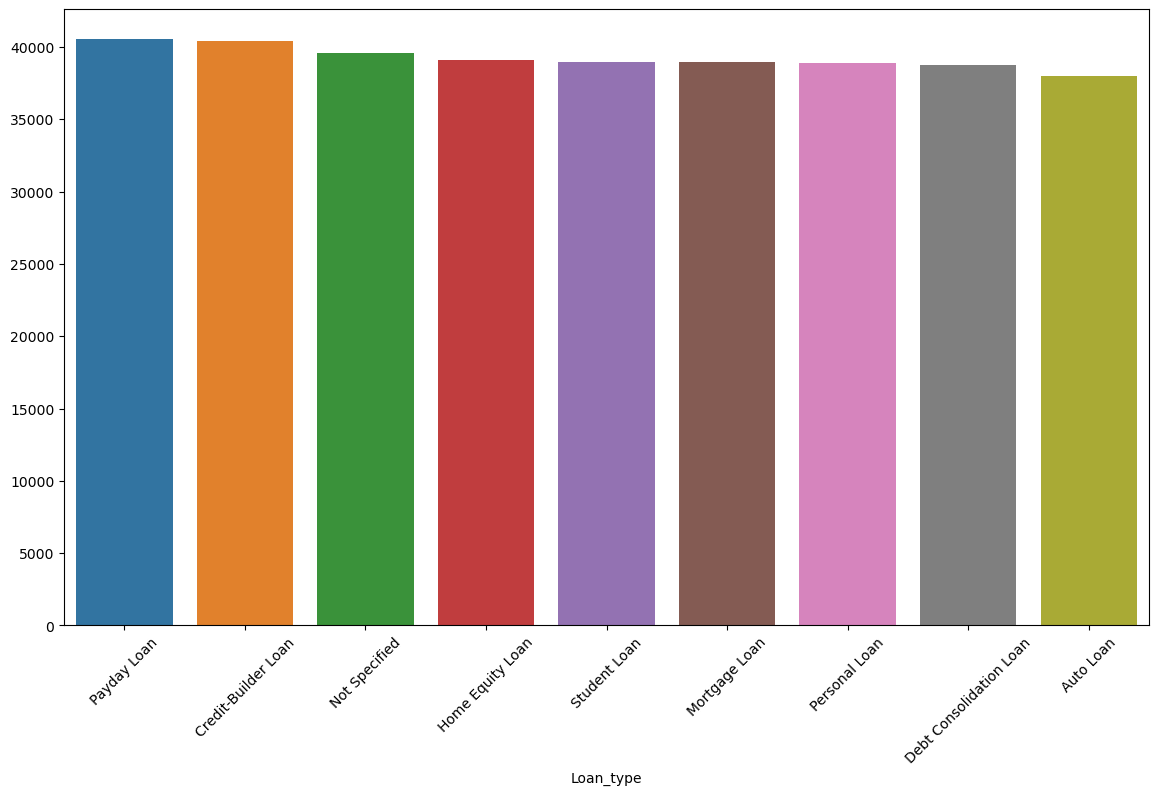

In [56]:
plt.figure(figsize=(14, 8))
sns.barplot(x=Loan_type_count.index, y=Loan_type_count.values)
plt.xticks(rotation=45)
plt.show()

### *Insights:-*
we have mostly payday loan, credit builder loan, not specified,home equity loan and student loan

In [57]:
df["Occupation"].replace("_______","Others",inplace=True)
df["Occupation"].unique()

array(['Scientist', 'Others', 'Teacher', 'Engineer', 'Entrepreneur',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Mechanic', 'Writer', 'Accountant', 'Architect', 'Musician',
       'Developer'], dtype=object)

In [58]:
Occupation_count = df['Occupation'].value_counts(dropna = False)
Occupation_count

Occupation
Others           24653
Lawyer           22845
Mechanic         22763
Scientist        22641
Engineer         22582
Developer        22521
Entrepreneur     22520
Doctor           22433
Accountant       22128
Architect        21827
Teacher          21707
Media_Manager    21629
Manager          21141
Journalist       20769
Writer           20703
Musician         20426
Name: count, dtype: int64

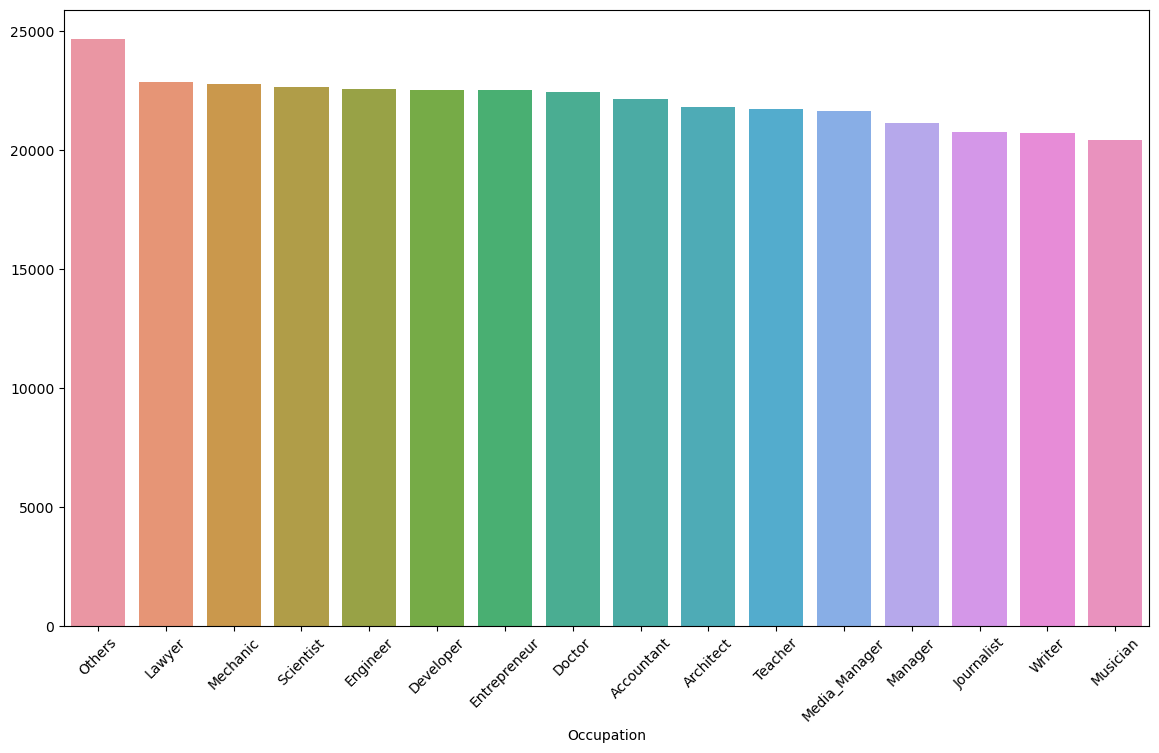

In [59]:
plt.figure(figsize=(14, 8))
sns.barplot(x=Occupation_count.index, y=Occupation_count.values)
plt.xticks(rotation=45)
plt.show()

### *Insights:-*
Top 5 occupations are Lawyers, Mechanic,scientist,Engineer,Developer

In [60]:
Credit_Mix_count = df['Credit_Mix'].value_counts(dropna = False)
Credit_Mix_count

Credit_Mix
3    120884
2    112913
0     71079
1     48412
Name: count, dtype: int64

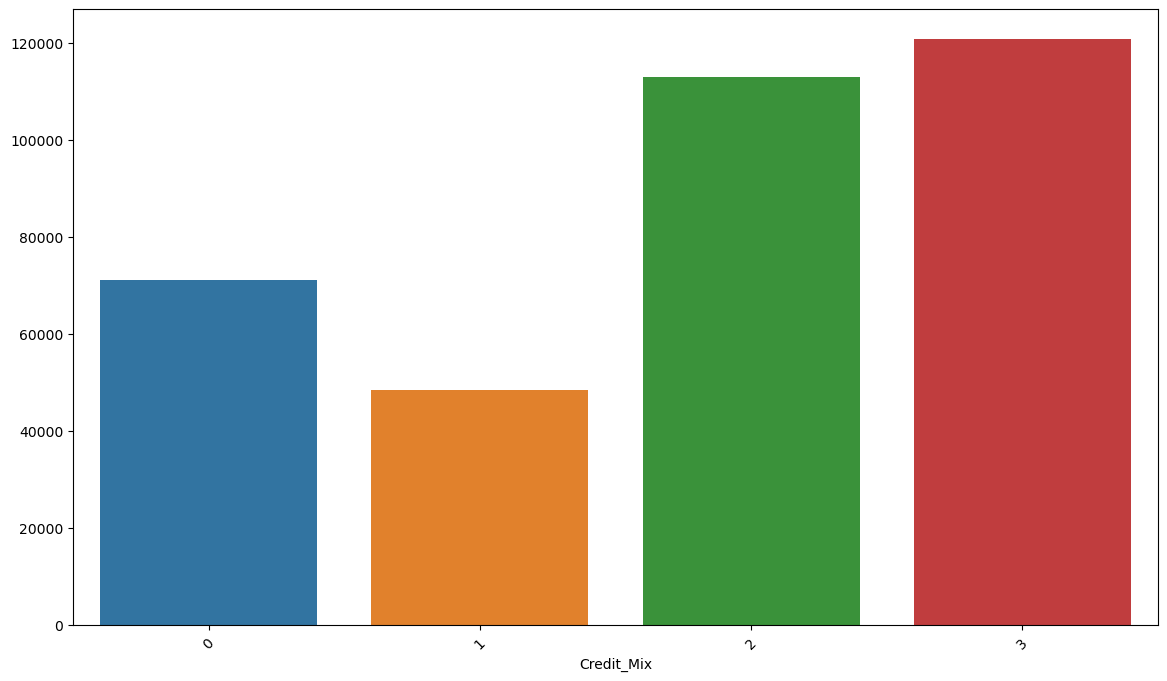

In [61]:
plt.figure(figsize=(14, 8))
sns.barplot(x=Credit_Mix_count.index, y=Credit_Mix_count.values)
plt.xticks(rotation=45)
plt.show()

### *Insights:-*
most of credit mix is 3 and 2

In [62]:
Payment_of_Min_Amount_count = df['Payment_of_Min_Amount'].value_counts(dropna = False)
Payment_of_Min_Amount_count

Payment_of_Min_Amount
1    239726
0    113562
Name: count, dtype: int64

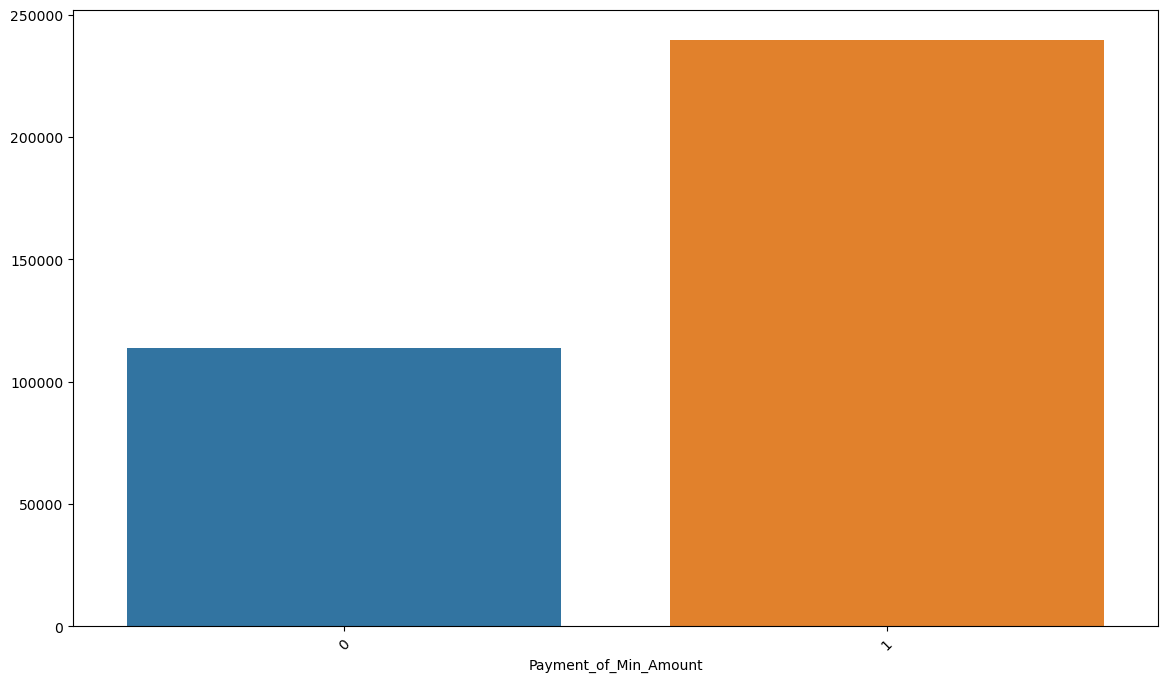

In [63]:
plt.figure(figsize=(14, 8))
sns.barplot(x=Payment_of_Min_Amount_count.index, y=Payment_of_Min_Amount_count.values)
plt.xticks(rotation=45)
plt.show()

### *Insights:-*
payment min amount paid is higher than no

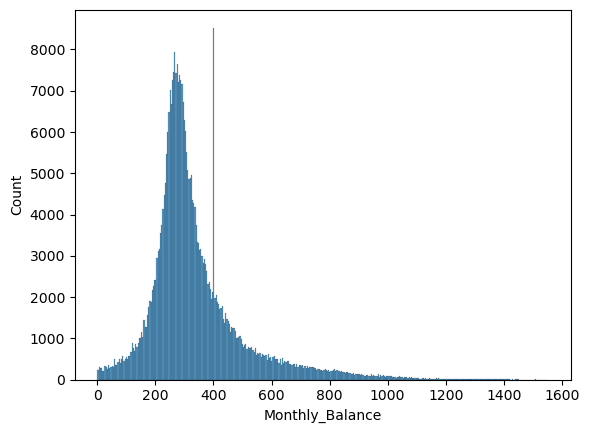

In [64]:
sns.histplot(df["Monthly_Balance"])
plt.show()

### *Insights:-*
maximum monthly balance is 200 to 300

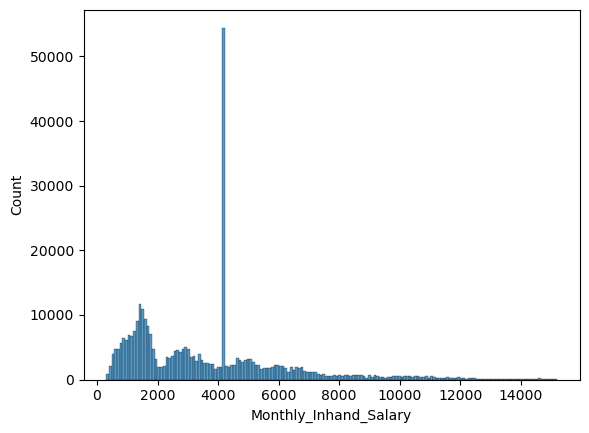

In [65]:
sns.histplot(df["Monthly_Inhand_Salary"])
plt.show()

### *Insights:-*
maximum Monthly_Inhand_Salary is 2000

Text(0.5, 1.0, 'Customer Age Distribution')

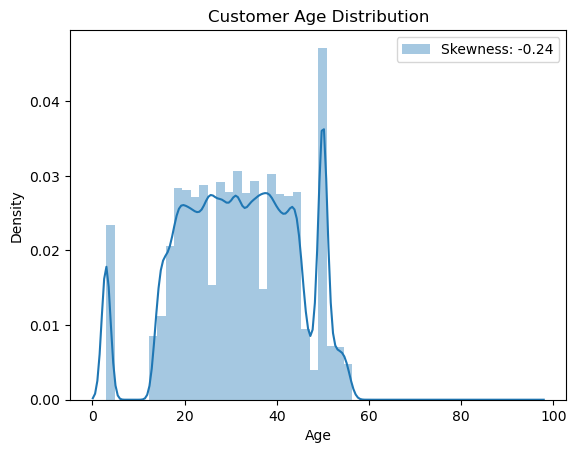

In [66]:
### Understanding the distribution of the column - Age
sns.distplot(df['Age'], label = 'Skewness: %.2f'%(df['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

### *Insights:-*
Maximum desnisty of at the age is 45 to 50

Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

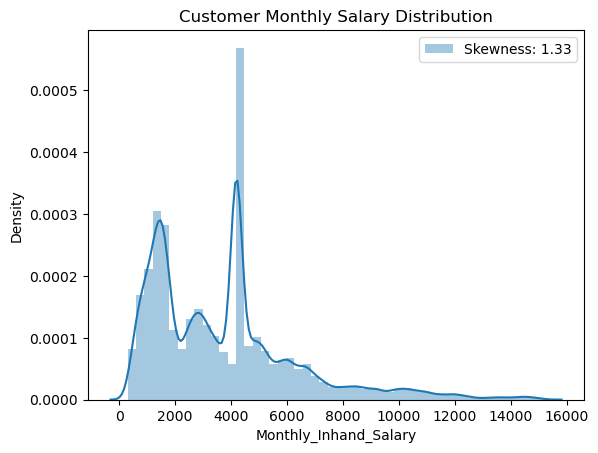

In [67]:
### Understanding the distribution of the column - Monthly_Inhand_Salary

sns.distplot(df['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')

### *Insights:-*
Maximum in mo nthly inhand salary density is 4000 and 1800

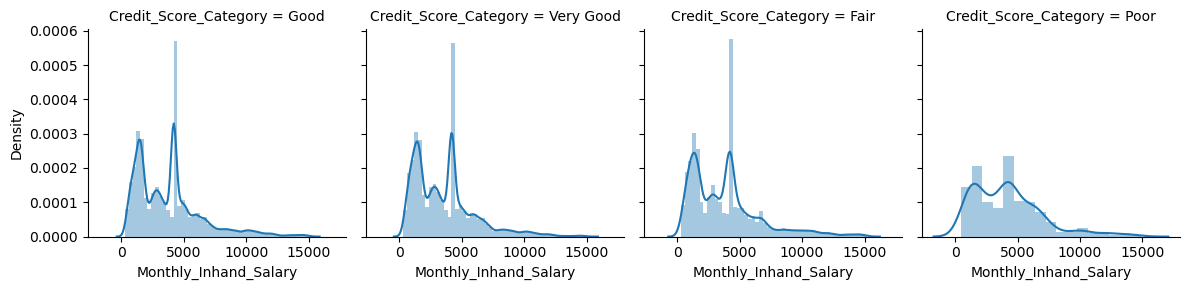

In [68]:
### Monthly Inhand Salary distribution by Credit Score
grid = sns.FacetGrid(df, col = 'Credit_Score_Category')
grid.map(sns.distplot, 'Monthly_Inhand_Salary')

### *Insights:-*
we have Monthly_Inhand_Salary for different scredit score category

Text(0.5, 1.0, 'Customer Monthly Inhand Salary by Credit Score')

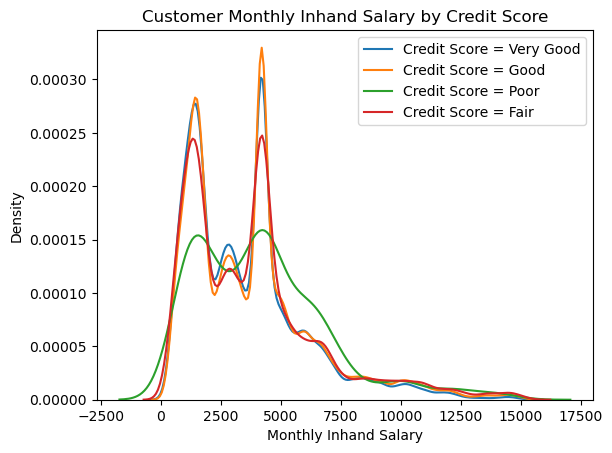

In [69]:
### Merging the above graphs into one
sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score_Category'] == 'Very Good'], label = 'Credit Score = Very Good')
sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score_Category'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score_Category'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score_Category'] == 'Fair'], label = 'Credit Score = Fair')
plt.xlabel('Monthly Inhand Salary')
plt.legend()
plt.title('Customer Monthly Inhand Salary by Credit Score')

### *Insights:-*
monthly inhand salary 4800 and 2000 has very good and good credit score category

Text(0.5, 1.0, 'Customers Interest Rate Distribution')

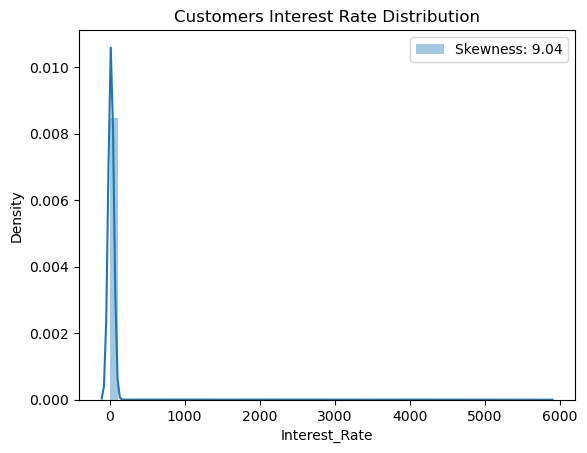

In [70]:

### Understanding the distribution of the column - Interest_Rate

sns.distplot(df['Interest_Rate'], label = 'Skewness: %.2f'%(df['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Customers Interest Rate Distribution')


### *Insights:-*
maximum density for interest rate  is 0

Text(0.5, 1.0, "Customer's Outstanding Debt  Distribution")

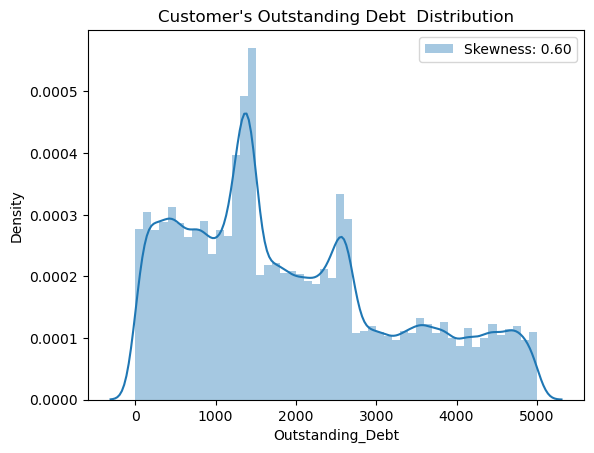

In [71]:
### Understanding the distribution of the column - Outstanding_Debt
sns.distplot(df['Outstanding_Debt'], label = 'Skewness: %.2f'%(df['Outstanding_Debt'].skew()))
plt.legend(loc = 'best')
plt.title("Customer's Outstanding Debt  Distribution")

### *Insights:-*
highest density for customers outstanding debt distribution is between 1000 to 1500

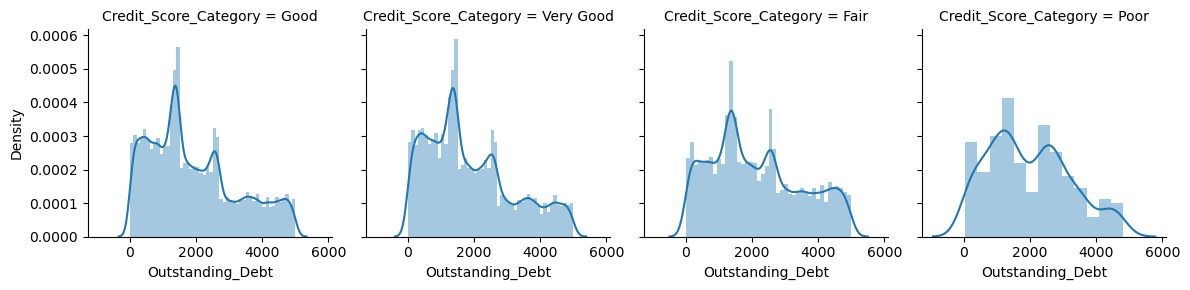

In [72]:
### Outstanding Debt distribution by Credit Score
grid = sns.FacetGrid(df, col = 'Credit_Score_Category')
grid.map(sns.distplot, 'Outstanding_Debt')

Text(0.5, 1.0, "Customer's Outstanding Debt by Credit Score")

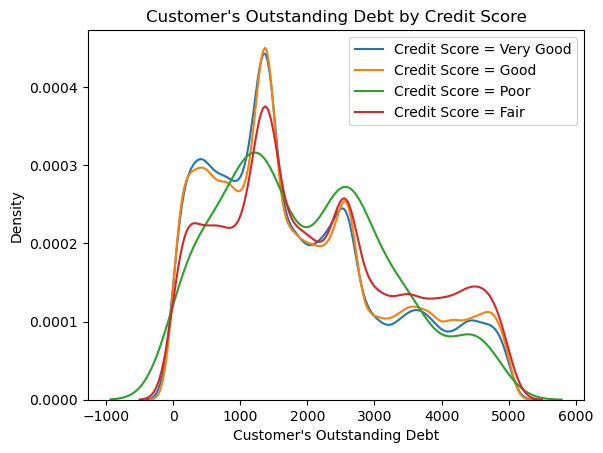

In [73]:
### Merging the above graphs into one
sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score_Category'] == 'Very Good'], label = 'Credit Score = Very Good')
sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score_Category'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score_Category'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score_Category'] == 'Fair'], label = 'Credit Score = Fair')
plt.xlabel("Customer's Outstanding Debt")
plt.legend()
plt.title("Customer's Outstanding Debt by Credit Score")

### *Insights:-*
Highest density for customers outstanding debt is 1500 and it very good and good credit score category

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


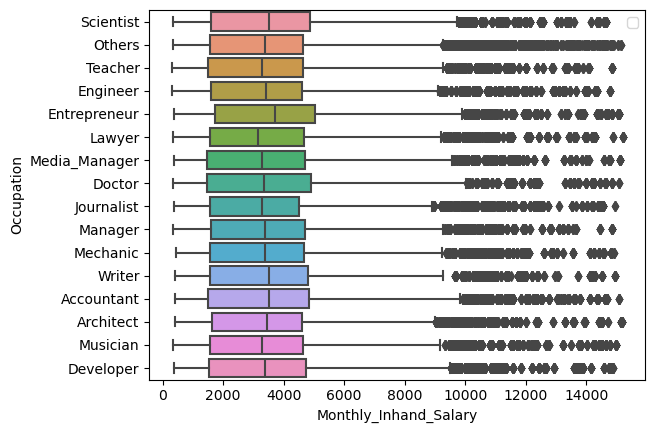

In [74]:
sns.boxplot(df,y="Occupation",x="Monthly_Inhand_Salary")
plt.legend()
plt.show()

### *Insights:-*
Every occupation has outlier in Monthly_Inhand_Salary

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


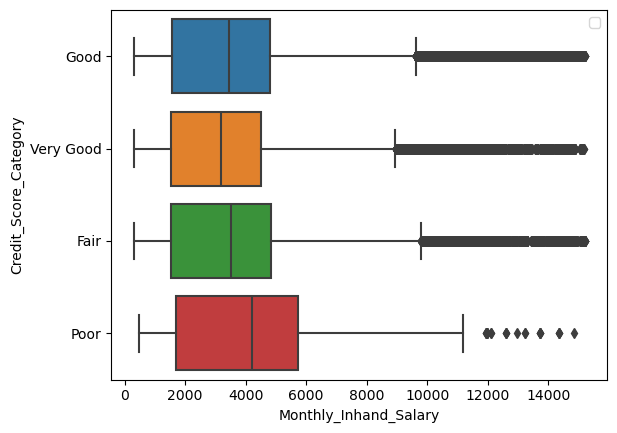

In [75]:
sns.boxplot(df,y="Credit_Score_Category",x="Monthly_Inhand_Salary")
plt.legend()
plt.show()

### *Insights:-*
Every credit score category has outlier in Monthly_Inhand_Salary

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


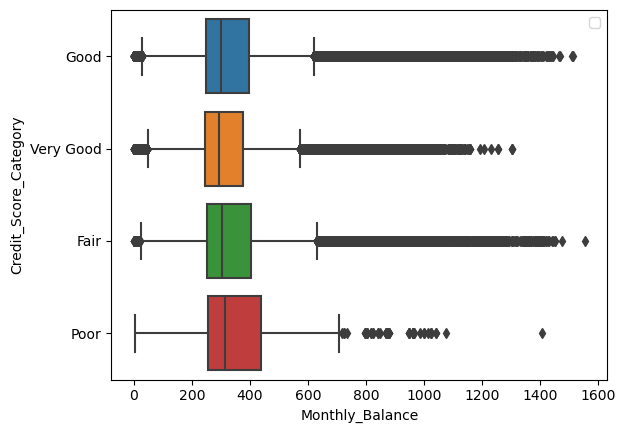

In [76]:
sns.boxplot(df,y="Credit_Score_Category",x="Monthly_Balance")
plt.legend()
plt.show()

### *Insights:-*
Every credit score category has outlier in monthly balance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


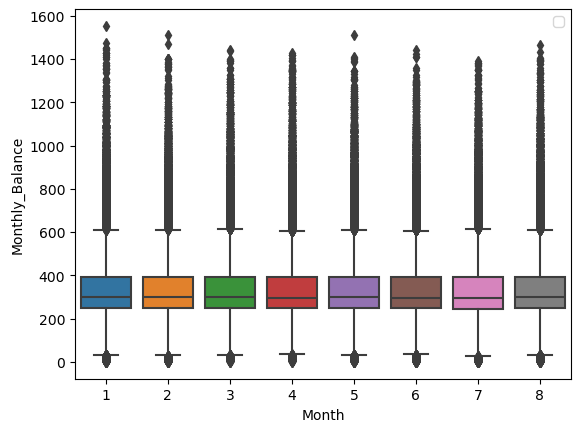

In [77]:
sns.boxplot(df,x="Month",y="Monthly_Balance")
plt.legend()
plt.show()

### *Insights:-*
Every month has outlier in monthly balance

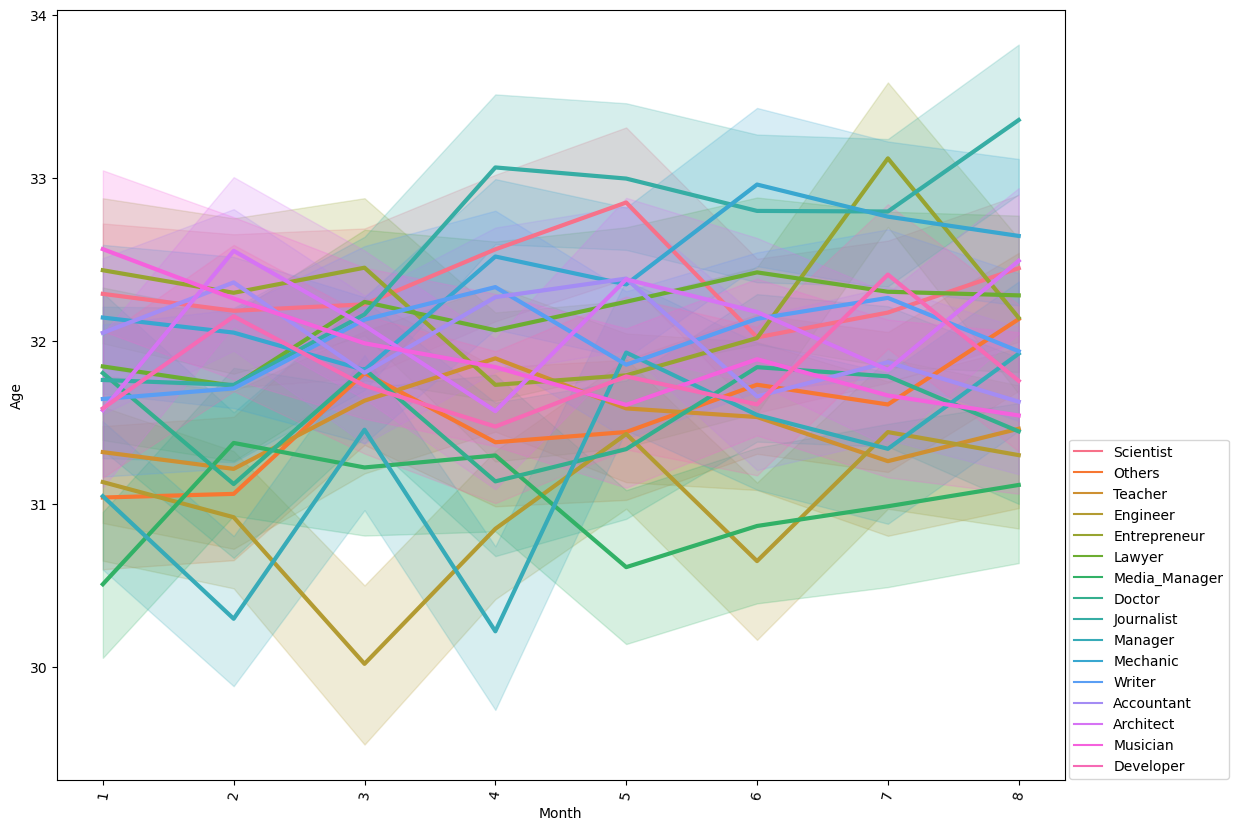

In [78]:
plt.figure(figsize=(13,10))
sns.lineplot(df,x='Month',y='Age', hue="Occupation", linewidth=3)
plt.xticks(rotation=80)
plt.legend(loc="right",bbox_to_anchor=(0.67, 0., 0.5, 0.442))
plt.show()

### *Insights:-*
we have line plot for age vs month hue occupation

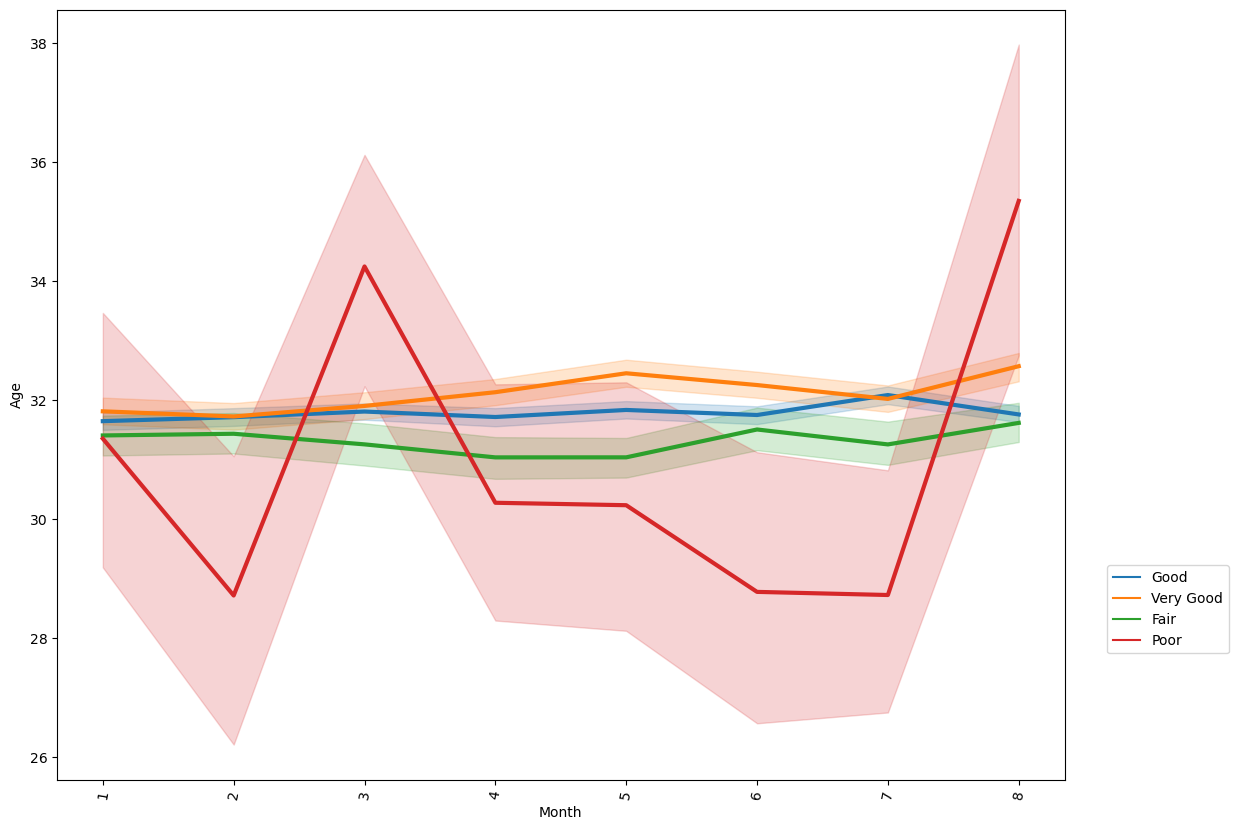

In [79]:
plt.figure(figsize=(13,10))
sns.lineplot(df,x='Month',y='Age', hue="Credit_Score_Category", linewidth=3)
plt.xticks(rotation=80)
plt.legend(loc="right",bbox_to_anchor=(0.67, 0., 0.5, 0.442))
plt.show()

### *Insights:-*
we have line plot for age vs month hue credit score category

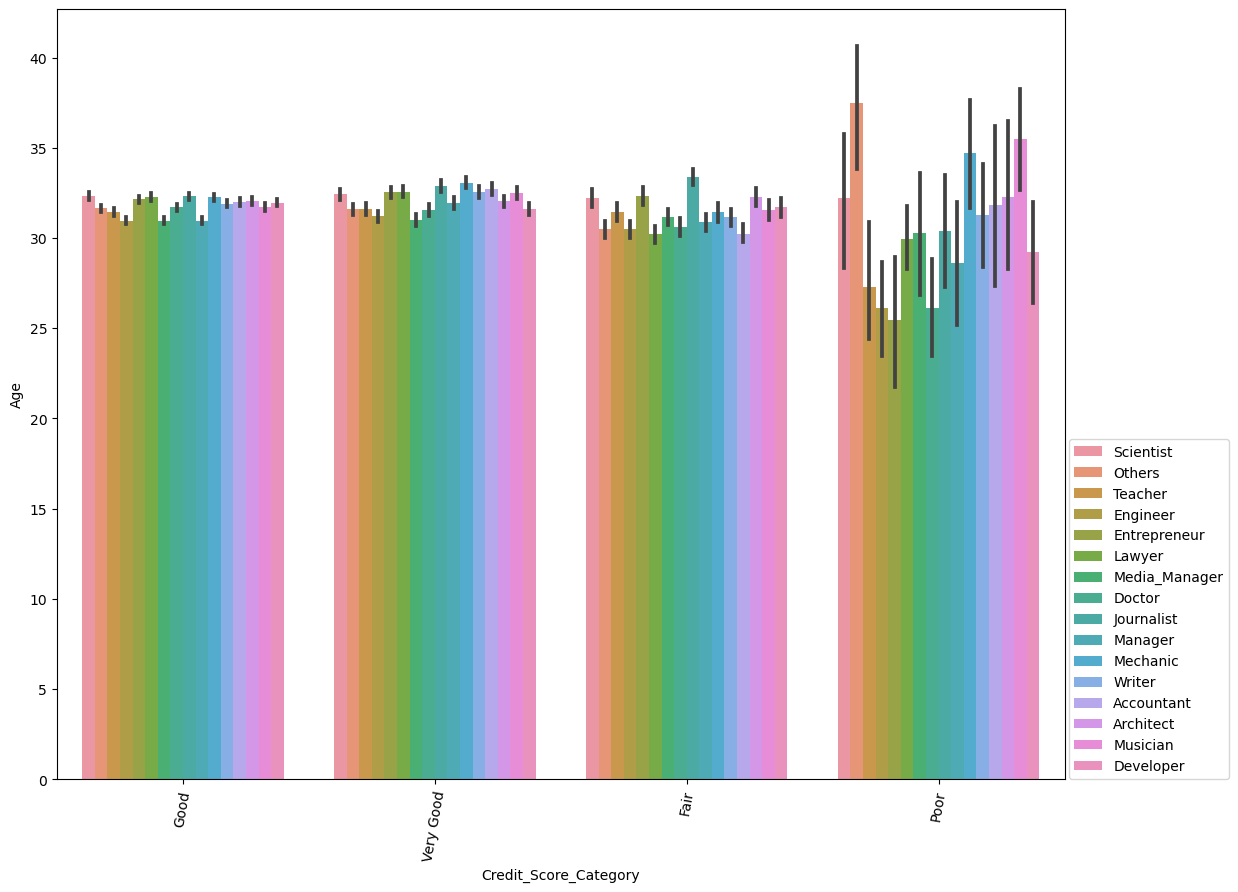

In [80]:
plt.figure(figsize=(13,10))
sns.barplot(df,x='Credit_Score_Category',y='Age', hue="Occupation", linewidth=3)
plt.xticks(rotation=80)
plt.legend(loc="right",bbox_to_anchor=(0.67, 0., 0.5, 0.442))
plt.show()

### *Insights:-*
we have line plot for age vs credit score category hue occupation

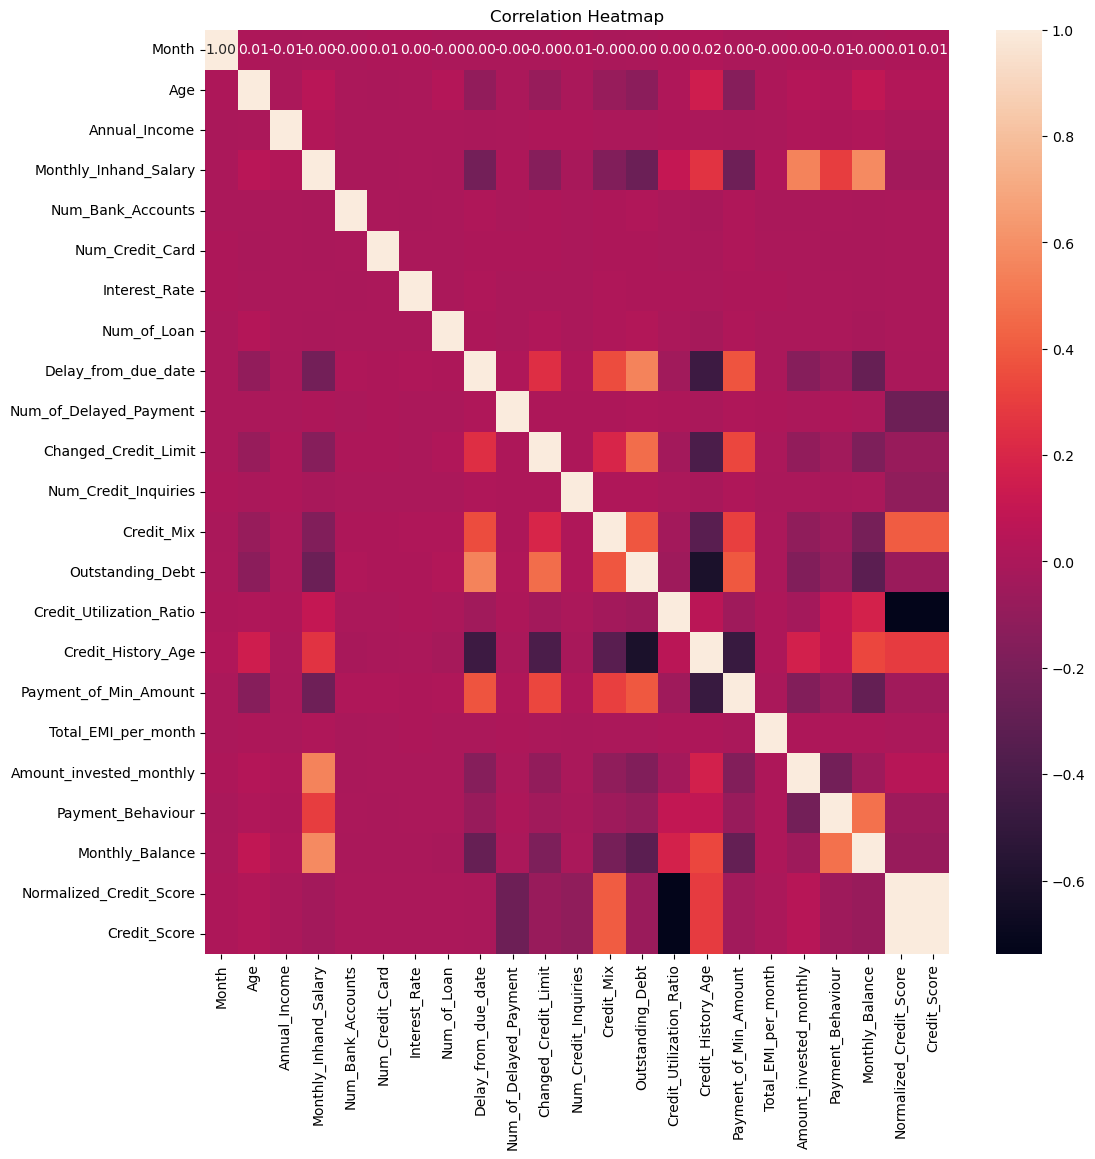

In [81]:
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### *Insights:-*
we dont see any impactful correlation

# Outlier detection

In [82]:
# Function to clip outliers in a column
def clip_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Clip values outside the bounds
    clipped_column = np.clip(column, lower_bound, upper_bound)
    return clipped_column


In [83]:
clip_outliers(df['Monthly_Balance'])

0         312.494089
1         312.494089
2         312.494089
3         312.494089
4         284.629163
             ...    
353283    516.809083
353284    319.164979
353285    319.164979
353286    393.673696
353287    393.673696
Name: Monthly_Balance, Length: 353288, dtype: float64

In [84]:
clip_outliers(df['Monthly_Inhand_Salary'])

0         1824.843333
1         1824.843333
2         1824.843333
3         1824.843333
4         4194.170850
             ...     
353283    3359.415833
353284    3359.415833
353285    3359.415833
353286    3359.415833
353287    3359.415833
Name: Monthly_Inhand_Salary, Length: 353288, dtype: float64

### *Insights:-*
we have outliers in Monthly_Inhand_Salary and Monthly_Balance

# Insights based on Non-Graphical and Visual Analysis 

We have seen occupation like Entrepreneur, doctor, Engineer, media manager with age greater than 31 has good and very good credit score category
Monthly balance and month in hand salary is low.
Credit mix is bad.
Credit score category good has highest numbers of occurence.
Monthly_Inhand_Salary, Type_of_Loan, Name, Credit_History_Age, Num_of_Delayed_Payment, Amount_invested_monthly, Num_Credit_Inquiries, Monthly_Balance has highest null values